In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = "Apprentice_Chef_Dataset.xlsx"

Chef = pd.read_excel(file)

Chef.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [2]:
#Checking for missing values
Chef.isnull().any()
#Family name is the only variable that has missing values

REVENUE                         False
CROSS_SELL_SUCCESS              False
NAME                            False
EMAIL                           False
FIRST_NAME                      False
FAMILY_NAME                      True
TOTAL_MEALS_ORDERED             False
UNIQUE_MEALS_PURCH              False
CONTACTS_W_CUSTOMER_SERVICE     False
PRODUCT_CATEGORIES_VIEWED       False
AVG_TIME_PER_SITE_VISIT         False
MOBILE_NUMBER                   False
CANCELLATIONS_BEFORE_NOON       False
CANCELLATIONS_AFTER_NOON        False
TASTES_AND_PREFERENCES          False
MOBILE_LOGINS                   False
PC_LOGINS                       False
WEEKLY_PLAN                     False
EARLY_DELIVERIES                False
LATE_DELIVERIES                 False
PACKAGE_LOCKER                  False
REFRIGERATED_LOCKER             False
FOLLOWED_RECOMMENDATIONS_PCT    False
AVG_PREP_VID_TIME               False
LARGEST_ORDER_SIZE              False
MASTER_CLASSES_ATTENDED         False
MEDIAN_MEAL_

In [3]:
lm_price_qual = smf.ols(formula = """ REVENUE ~ TOTAL_MEALS_ORDERED""",
                        data = Chef)

#fitting the model
results= lm_price_qual.fit()

print(results.summary())

#Very low Adj. R-squared of 0.360 
#High F-statistic of .1096
#The total meals ordered only explains 36% of the variation 

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          4.99e-191
Time:                        15:34:09   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1184.9468    

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

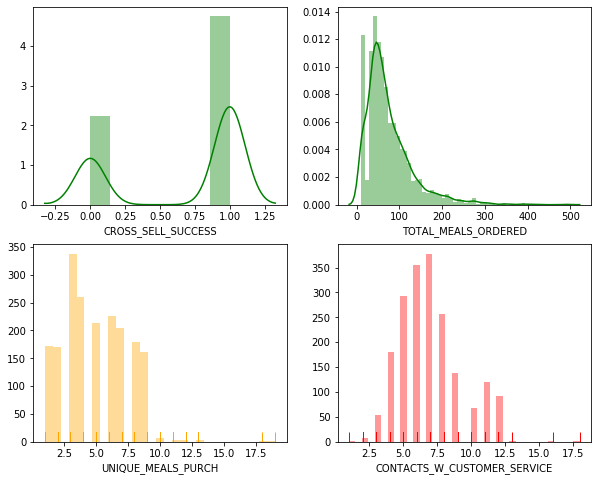

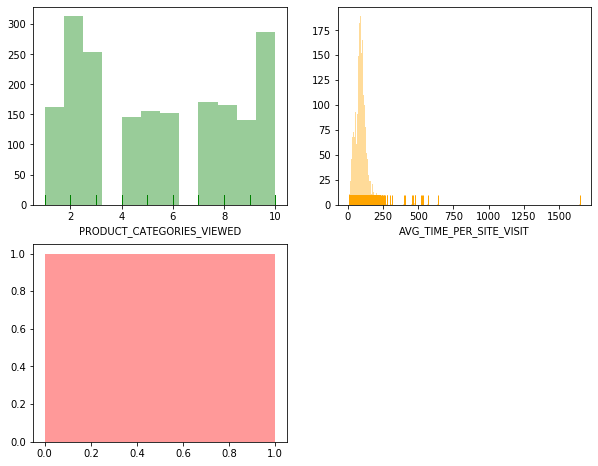

In [4]:
########################
# Visual EDA (Histograms) 
#OUTLIER ANALYSIS - CREATING THE BARPLOTS AND BOXPLOTS
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

#########################################


plt.subplot(2, 2, 2)
sns.distplot(Chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')


#########################################

plt.subplot(2, 2, 3)
sns.distplot(Chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

#########################################


plt.subplot(2, 2, 4)
sns.distplot(Chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

#########################################
#########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

#########################################



plt.subplot(2, 2, 2)
sns.distplot(Chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')


#########################################


plt.subplot(2, 2, 3)
sns.distplot(Chef['MOBILE_NUMBER'],
             bins  = 'fd',
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_NUMBER')

#########################################



plt.subplot(2, 2, 4)
sns.distplot(Chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')


#########################################
#########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')


#########################################



plt.subplot(2, 2, 2)
sns.distplot(Chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')


#########################################


plt.subplot(2, 2, 3)
sns.distplot(Chef['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')


#########################################


plt.subplot(2, 2, 4)
sns.distplot(Chef['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('PC_LOGINS')


#########################################
#########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('WEEKLY_PLAN')

#########################################


plt.subplot(2, 2, 2)
sns.distplot(Chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')


#########################################


plt.subplot(2, 2, 3)
sns.distplot(Chef['LATE_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

#########################################


plt.subplot(2, 2, 4)
sns.distplot(Chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('PACKAGE_LOCKER')


#########################################
#########################################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             rug   = True,
             color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')

#########################################


plt.subplot(2, 2, 2)
sns.distplot(Chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')


#########################################


plt.subplot(2, 2, 3)
sns.distplot(Chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

#########################################


plt.subplot(2, 2, 4)
sns.distplot(Chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('LARGEST_ORDER_SIZE')


########################################
########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')

#########################################


plt.subplot(2, 2, 2)
sns.distplot(Chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')


#########################################


plt.subplot(2, 2, 3)
sns.distplot(Chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

#########################################


plt.subplot(2, 2, 4)
sns.distplot(Chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')


#########################################
#########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Chef['REVENUE'],
             bins  = 'fd',
             kde   = False,
             color = 'g')
plt.xlabel('REVENUE')
########################################
#BOXPLOT - RVEVENUE
fig, ax = plt.subplots(figsize = (13, 8))
plt.subplot(2, 2, 2)
sns.boxplot(Chef['REVENUE'],
             color = 'y')
plt.xlabel('REVENUE')

fig, ax = plt.subplots(figsize = (13, 8))
plt.subplot(2, 2, 3)
sns.boxplot(Chef['WEEKLY_PLAN'],
             color = 'orange')
plt.xlabel('WEEKLY_PLAN')

In [5]:
#both sides of flags >= 5% dataset
#CHECKING FOR VALUE COUNTS & QUANTILES (DEPENDING ON ONE OR TWO SIDES)

#Chef["TOTAL_PHOTOS_VIEWED"].quantile(.95)

Chef["UNIQUE_MEALS_PURCH"].value_counts()



3     338
4     260
6     226
5     214
7     205
8     179
1     173
2     170
9     162
10      7
12      4
13      3
11      3
19      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64

In [34]:
# setting outlier thresholds
Total_meals_hi         = 190
Unique_meals_hi        = 9
#looking at the value_counts() the cutoff point would be at 9 meals
Contact_w_customer_lo  = 2
Contact_w_customer_hi  = 13
#looking at the value_counts() the cutoff point would be at 2 & 13 
Avg_time_site_hi       = 150
Cancellation_before_hi = 5
#LOOKING AT THE VALUE COUNTS THE THRESHOLD IS AT 5
Cancellation_after_hi  = 2
#LOOKING AT THE VALUE COUNTS THE THRESHOLD IS AT 2
Mobile_login_lo        = 5
Mobile_login_hi        = 6
#looking at the value_counts() the cutoff point would be at 5 & 6
Pc_login_lo            = 1
Pc_login_hi            = 2
#looking at the value_counts() the cutoff point would be at 1 & 2
Weekly_plan_hi         = 30
#BASED ON THE BOXPLOT WEEKLY PLAN SEEMS TO CUT OFF AT 30 
Early_deliveries_hi    = 6
Late_deliveries_hi     = 8
#BASED ON THE .95 QUANTILE REVENUE SEEMS TO CUT OFF AT 8
Avg_prep_hi            = 280
Largest_order_lo       = 2
Largest_order_hi       = 8
Master_class_hi        = 2
Median_rating_hi       = 4
Avg_clicks_lo          = 8
Avg_clicks_hi          = 18
Total_photos_hi        = 470
#BASED ON THE .95 QUANTILE REVENUE SEEMS TO CUT OFF AT 470

#BASED ON THE BOXPLOT AND THE .95 QUANTILE REVENUE SEEMS TO CUT OFF AT 4500 
Revenue_hi             = 4500

Chef["out_CONTACTS_W_CUSTOMER_SERVICE"].value_counts()

0    1943
1       3
Name: out_CONTACTS_W_CUSTOMER_SERVICE, dtype: int64

In [7]:

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
Chef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = Chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][Chef['TOTAL_MEALS_ORDERED'] > Total_meals_hi]

Chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)


# UNIQUE_MEALS_PURCH 
Chef['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = Chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][Chef['UNIQUE_MEALS_PURCH'] > Unique_meals_hi]

Chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
Chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = Chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][Chef['CONTACTS_W_CUSTOMER_SERVICE'] > Contact_w_customer_hi]
condition_lo = Chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][Chef['CONTACTS_W_CUSTOMER_SERVICE'] < Contact_w_customer_lo]

Chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

Chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



# AVG_TIME_PER_SITE_VISIT
Chef['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = Chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][Chef['AVG_TIME_PER_SITE_VISIT'] > Avg_time_site_hi]

Chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
Chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = Chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][Chef['CANCELLATIONS_BEFORE_NOON'] > Cancellation_before_hi]

Chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
Chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = Chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][Chef['CANCELLATIONS_AFTER_NOON'] > Cancellation_after_hi]

Chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# MOBILE_LOGINS
Chef['out_MOBILE_LOGINS'] = 0
condition_hi = Chef.loc[0:,'out_MOBILE_LOGINS'][Chef['MOBILE_LOGINS'] > Mobile_login_hi]
condition_lo = Chef.loc[0:,'out_MOBILE_LOGINS'][Chef['MOBILE_LOGINS'] < Mobile_login_lo]

Chef['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

Chef['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



# PC_LOGINS
Chef['out_PC_LOGINS'] = 0
condition_hi = Chef.loc[0:,'out_PC_LOGINS'][Chef['PC_LOGINS'] > Pc_login_hi]
condition_lo = Chef.loc[0:,'out_PC_LOGINS'][Chef['PC_LOGINS'] < Pc_login_lo]

Chef['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

Chef['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
Chef['out_WEEKLY_PLAN'] = 0
condition_hi = Chef.loc[0:,'out_WEEKLY_PLAN'][Chef['WEEKLY_PLAN'] > Weekly_plan_hi]

Chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# EARLY_DELIVERIES
Chef['out_EARLY_DELIVERIES'] = 0
condition_hi = Chef.loc[0:,'out_EARLY_DELIVERIES'][Chef['EARLY_DELIVERIES'] > Early_deliveries_hi]

Chef['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
Chef['out_LATE_DELIVERIES'] = 0
condition_hi = Chef.loc[0:,'out_LATE_DELIVERIES'][Chef['LATE_DELIVERIES'] > Late_deliveries_hi]

Chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_PREP_VID_TIME
Chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = Chef.loc[0:,'out_AVG_PREP_VID_TIME'][Chef['AVG_PREP_VID_TIME'] > Avg_prep_hi]

Chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LARGEST_ORDER_SIZE
Chef['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = Chef.loc[0:,'out_LARGEST_ORDER_SIZE'][Chef['LARGEST_ORDER_SIZE'] > Largest_order_hi]
condition_lo = Chef.loc[0:,'out_LARGEST_ORDER_SIZE'][Chef['LARGEST_ORDER_SIZE'] < Largest_order_lo]

Chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

Chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# MASTER_CLASSES_ATTENDED
Chef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = Chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][Chef['MASTER_CLASSES_ATTENDED'] > Master_class_hi]

Chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MEDIAN_MEAL_RATING
Chef['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = Chef.loc[0:,'out_MEDIAN_MEAL_RATING'][Chef['MEDIAN_MEAL_RATING'] > Median_rating_hi]

Chef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_CLICKS_PER_VISIT
Chef['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = Chef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][Chef['AVG_CLICKS_PER_VISIT'] > Avg_clicks_hi]
condition_lo = Chef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][Chef['AVG_CLICKS_PER_VISIT'] < Avg_clicks_lo]

Chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

Chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


# TOTAL_PHOTOS_VIEWED
Chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = Chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][Chef['TOTAL_PHOTOS_VIEWED'] > Total_photos_hi]

Chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)




####################



# REVENUE
Chef['out_REVENUE'] = 0
condition_hi = Chef.loc[0:,'out_REVENUE'][Chef['REVENUE'] > Revenue_hi]

Chef['out_REVENUE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


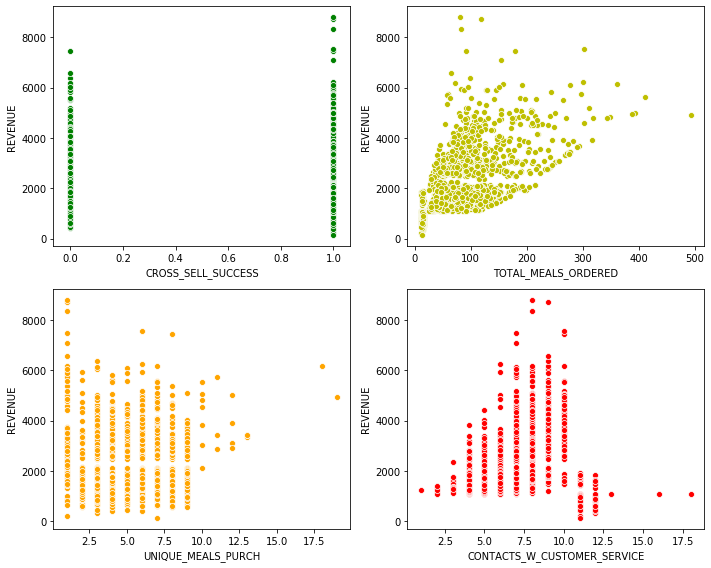

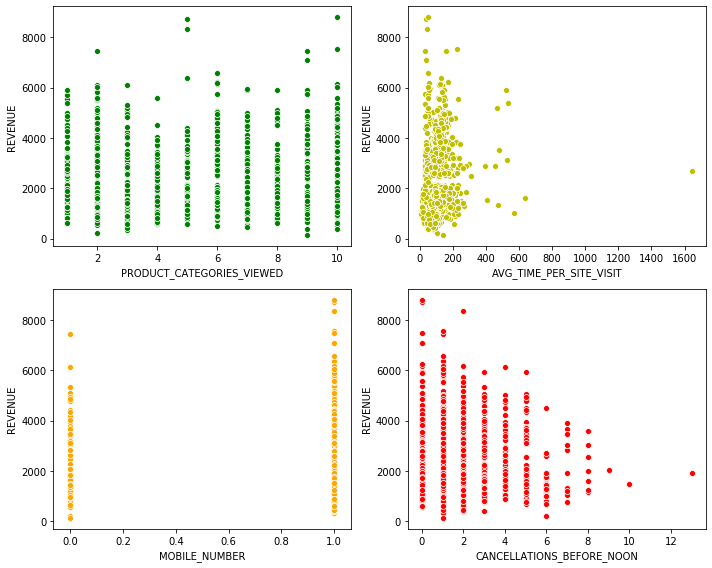

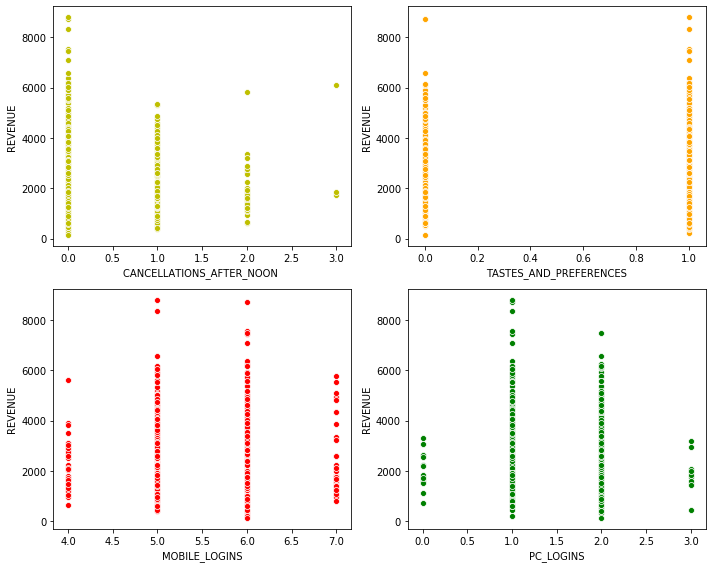

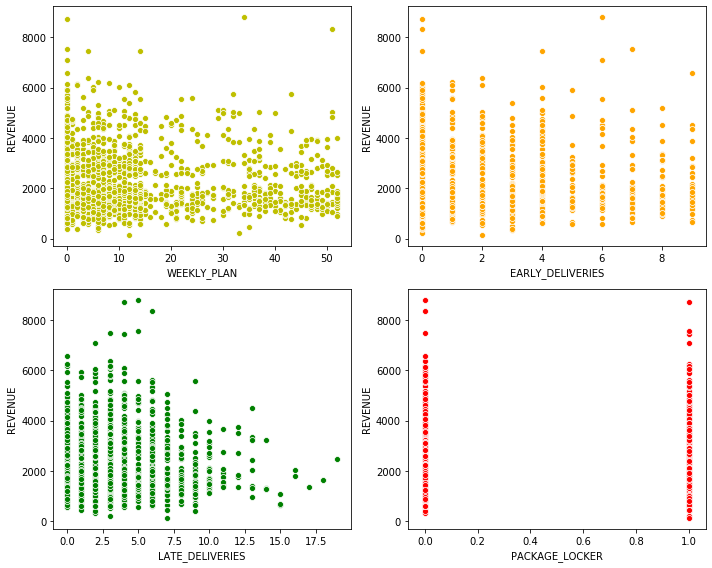

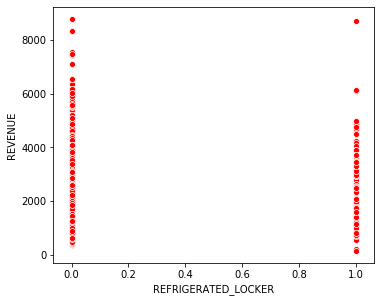

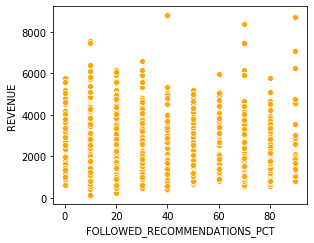

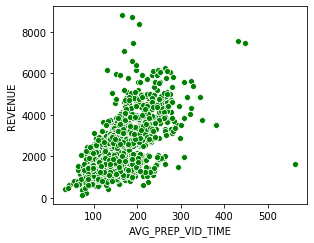

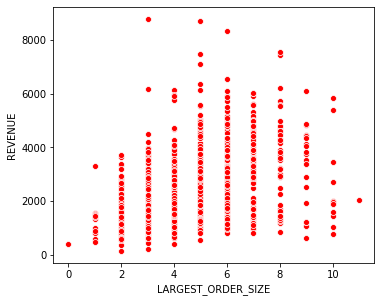

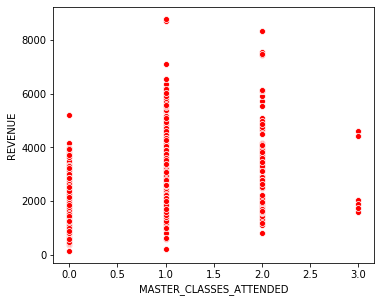

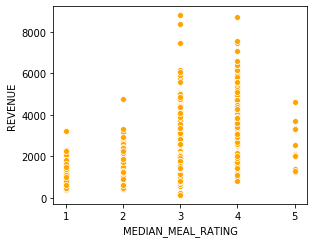

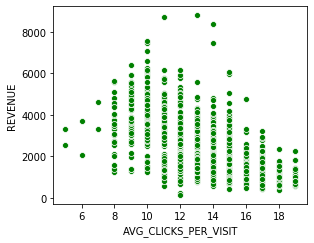

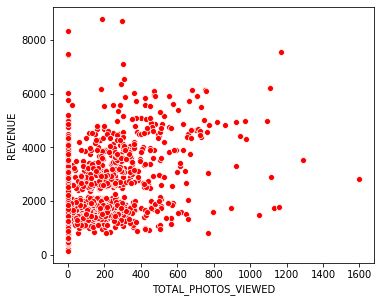

In [8]:

########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Chef['CROSS_SELL_SUCCESS'],
                y = Chef['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Chef['TOTAL_MEALS_ORDERED'],
                y = Chef['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Chef['UNIQUE_MEALS_PURCH'],
                y = Chef['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = Chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('CONTACTS_W_CUSTOMER_SERVICE 1 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Chef['PRODUCT_CATEGORIES_VIEWED'],
                y = Chef['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Chef['AVG_TIME_PER_SITE_VISIT'],
                y = Chef['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Chef['MOBILE_NUMBER'],
                y = Chef['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Chef['CANCELLATIONS_BEFORE_NOON'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('CANCELLATIONS_BEFORE_NOON 2 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Chef['CANCELLATIONS_AFTER_NOON'],
                y = Chef['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON ')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Chef['TASTES_AND_PREFERENCES'],
                y = Chef['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Chef['MOBILE_LOGINS'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Chef['PC_LOGINS'],
                y = Chef['REVENUE'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Housing Data Scatterplots 3 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Chef['WEEKLY_PLAN'],
                y = Chef['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Chef['EARLY_DELIVERIES'],
                y = Chef['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

plt.subplot(2, 2, 3)
sns.scatterplot(x = Chef['LATE_DELIVERIES'],
                y = Chef['REVENUE'],
                color = 'g')
plt.xlabel('LATE_DELIVERIES')

plt.subplot(2, 2, 4)
sns.scatterplot(x = Chef['PACKAGE_LOCKER'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('PACKAGE_LOCKER')

plt.tight_layout()
plt.savefig('PACKAGE_LOCKER 4 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Chef['REFRIGERATED_LOCKER'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')
plt.tight_layout()
plt.savefig('REFRIGERATED_LOCKER 5 of 5.png')
plt.show()

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = Chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = Chef['REVENUE'],
                color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = Chef['AVG_PREP_VID_TIME'],
                y = Chef['REVENUE'],
                color = 'g')
plt.xlabel('AVG_PREP_VID_TIME')

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = Chef['LARGEST_ORDER_SIZE'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

plt.tight_layout()
plt.savefig('LARGEST_ORDER_SIZE 4 of 5.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Chef['MASTER_CLASSES_ATTENDED'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.savefig('MASTER_CLASSES_ATTENDED 5 of 5.png')
plt.show()

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = Chef['MEDIAN_MEAL_RATING'],
                y = Chef['REVENUE'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = Chef['AVG_CLICKS_PER_VISIT'],
                y = Chef['REVENUE'],
                color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = Chef['TOTAL_PHOTOS_VIEWED'],
                y = Chef['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('TOTAL_PHOTOS_VIEWED 4 of 5.png')
plt.show()


In [9]:
# setting trend-based thresholds
Total_meals_change_hi     = 250 # data scatters above this point
Unique_meals_change_hi   = 9 # data scatters above this point
Contacts_w_customer_change_hi   = 10  # trend changes above this point
Avg_time_visit_change_hi  = 300 # data scatters above this point
Cancellation_before_change_hi  = 10 # data scatters above this point
Mobile_login_change_hi   = 6  # trend changes above this point
Early_deliveries_change_hi   = 3  # trend changes above this point
Late_deliveries_change_hi   = 11  # trend changes above this point
Avg_prep_vid_change_hi     = 290 # data scatters above this point
Largest_order_change_hi   = 5  # trend changes above this point
Master_classes_change_hi   = 1  # trend changes above this point
Median__meal_rating_change_hi   = 4  # trend changes above this point
Avg_clicks_per_visit_change_hi   = 10  # trend changes above this point
Total_photos_viewed_change_hi   = 500 # data scatters above this point
Weekly_plan_change_at = 16 # data scatters above this point

#####################################################
Mobile_number_change_at = 1 # only different at 5
Cancellation_after_change_at = 0 # zero inflated
Pc_login_change_at      = 1 # big changes at 1
Weekly_plan_change_at = 0 # zero inflated
Refrigerated_change_at   = 0 # zero inflated (especielly when looking at value counts 1726 zeros and 220 ones)

In [10]:

##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers


# TOTAL_MEALS_ORDERED
Chef['change_TOTAL_MEALS_ORDERED'] = 0
condition = Chef.loc[0:,'change_TOTAL_MEALS_ORDERED'][Chef['TOTAL_MEALS_ORDERED'] > Total_meals_change_hi]

Chef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# UNIQUE_MEALS_PURCH
Chef['change_UNIQUE_MEALS_PURCH'] = 0
condition = Chef.loc[0:,'change_UNIQUE_MEALS_PURCH'][Chef['UNIQUE_MEALS_PURCH'] > Unique_meals_change_hi]

Chef['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
Chef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0

condition = Chef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][Chef['CONTACTS_W_CUSTOMER_SERVICE'] > Contacts_w_customer_change_hi]

Chef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


# AVG_TIME_PER_SITE_VISIT
Chef['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = Chef.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][Chef['AVG_TIME_PER_SITE_VISIT'] > Avg_time_visit_change_hi]

Chef['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# CANCELLATIONS_BEFORE_NOON
Chef['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = Chef.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][Chef['CANCELLATIONS_BEFORE_NOON'] > Cancellation_before_change_hi]

Chef['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
Chef['change_MOBILE_LOGINS'] = 0

condition = Chef.loc[0:,'change_MOBILE_LOGINS'][Chef['MOBILE_LOGINS'] > Mobile_login_change_hi]

Chef['change_MOBILE_LOGINS'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


# EARLY_DELIVERIES
Chef['change_EARLY_DELIVERIES'] = 0
condition = Chef.loc[0:,'change_EARLY_DELIVERIES'][Chef['EARLY_DELIVERIES'] > Early_deliveries_change_hi]

Chef['change_EARLY_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# LATE_DELIVERIES
Chef['change_LATE_DELIVERIES'] = 0
condition = Chef.loc[0:,'change_LATE_DELIVERIES'][Chef['LATE_DELIVERIES'] > Late_deliveries_change_hi]

Chef['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# AVG_PREP_VID_TIME
Chef['change_AVG_PREP_VID_TIMEE'] = 0

condition = Chef.loc[0:,'change_AVG_PREP_VID_TIMEE'][Chef['AVG_PREP_VID_TIME'] > Avg_prep_vid_change_hi]

Chef['change_AVG_PREP_VID_TIMEE'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


# LARGEST_ORDER_SIZE
Chef['change_LARGEST_ORDER_SIZE'] = 0
condition = Chef.loc[0:,'change_LARGEST_ORDER_SIZE'][Chef['LARGEST_ORDER_SIZE'] > Largest_order_change_hi]

Chef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# MASTER_CLASSES_ATTENDED
Chef['change_MASTER_CLASSES_ATTENDED'] = 0
condition = Chef.loc[0:,'change_MASTER_CLASSES_ATTENDED'][Chef['MASTER_CLASSES_ATTENDED'] > Master_classes_change_hi]

Chef['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# MEDIAN_MEAL_RATING
Chef['change_MEDIAN_MEAL_RATING'] = 0

condition = Chef.loc[0:,'change_MEDIAN_MEAL_RATING'][Chef['MEDIAN_MEAL_RATING'] > Median__meal_rating_change_hi]

Chef['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# AVG_CLICKS_PER_VISIT
Chef['change_AVG_CLICKS_PER_VISIT'] = 0
condition = Chef.loc[0:,'change_AVG_CLICKS_PER_VISIT'][Chef['AVG_CLICKS_PER_VISIT'] > Avg_clicks_per_visit_change_hi]

Chef['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
Chef['change_TOTAL_PHOTOS_VIEWED'] = 0

condition = Chef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][Chef['TOTAL_PHOTOS_VIEWED'] > Total_photos_viewed_change_hi]

Chef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


# WEEKLY_PLAN
Chef['change_WEEKLY_PLAN'] = 0

condition = Chef.loc[0:,'change_WEEKLY_PLAN'][Chef['WEEKLY_PLAN'] > Weekly_plan_change_at]

Chef['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


########################################
## change at threshold                ##
########################################

# double-equals sign

# MOBILE_NUMBER
Chef['change_MOBILE_NUMBER'] = 0
condition = Chef.loc[0:,'change_MOBILE_NUMBER'][Chef['MOBILE_NUMBER'] == Mobile_number_change_at]

Chef['change_MOBILE_NUMBER'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# CANCELLATIONS_AFTER_NOON 
Chef['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = Chef.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][Chef['CANCELLATIONS_AFTER_NOON'] == Cancellation_after_change_at]

Chef['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# PC_LOGINS
Chef['change_PC_LOGINS'] = 0
condition = Chef.loc[0:,'change_PC_LOGINS'][Chef['PC_LOGINS'] == Pc_login_change_at]

Chef['change_PC_LOGINS'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# WEEKLY_PLAN
Chef['change_WEEKLY_PLAN'] = 0
condition = Chef.loc[0:,'change_WEEKLY_PLAN'][Chef['WEEKLY_PLAN'] == Weekly_plan_change_at]

Chef['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# REFRIGERATED_LOCKER
Chef['change_REFRIGERATED_LOCKER'] = 0
condition = Chef.loc[0:,'change_REFRIGERATED_LOCKER'][Chef['REFRIGERATED_LOCKER'] == Refrigerated_change_at]

Chef['change_REFRIGERATED_LOCKER'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

In [11]:
# printing columns
print(f"""
NAME
------
{Chef['NAME'].value_counts()}


EMAIL
----------
{Chef['EMAIL'].value_counts()}


FIRST_NAME
-------------
{Chef['FIRST_NAME'].value_counts()}


FAMILY_NAME
-------------
{Chef['FAMILY_NAME'].value_counts()}

UNIQUE_MEALS_PURCH
------
{Chef['UNIQUE_MEALS_PURCH'].value_counts()}


PACKAGE_LOCKER
----------
{Chef['PACKAGE_LOCKER'].value_counts()}


REFRIGERATED_LOCKER
-------------
{Chef['TASTES_AND_PREFERENCES'].value_counts()}


TASTES_AND_PREFERENCES
-------------
{Chef['TASTES_AND_PREFERENCES'].value_counts()}


PRODUCT_CATEGORIES_VIEWED
-------------
{Chef['PRODUCT_CATEGORIES_VIEWED'].value_counts()}


MEDIAN_MEAL_RATING
-------------
{Chef['PRODUCT_CATEGORIES_VIEWED'].value_counts()}
""")

#MIGHT WANT TO GROUP UNIQUE MEALS TOGETHER FROM 9 AND ABOVE TO CREATE A SIGNIFICANT VARIABLE 
#THERE ARE A LOT OF PEOPLE WITH FAMILY NAME OF FRANK AND STARK AND LANNISTER, HOWVER IT DOESNT GIVE US ANY INSIGHTS INTO BUSINESS PERFORMNCE


NAME
------
Robert Frey           1
Aemon Blackfyre       1
Jon Cupps             1
Val                   1
Martyn Mullendore     1
                     ..
Archibald Yronwood    1
Aelinor Penrose       1
Matthar               1
Rymolf                1
Qyburn                1
Name: NAME, Length: 1946, dtype: int64


EMAIL
----------
arya.stark@homedepot.com         1
eustace.(braavos)@yahoo.com      1
jonothor.darry@yahoo.com         1
wate@homedepot.com               1
rodrik.ryswell@protonmail.com    1
                                ..
bess.bracken@yahoo.com           1
willem.frey@caterpillar.com      1
matthar@yahoo.com                1
vortimer.crane@protonmail.com    1
luke.of.longtown@me.com          1
Name: EMAIL, Length: 1946, dtype: int64


FIRST_NAME
-------------
Jon         21
Jeyne       14
Aegon       12
Walder      10
Alyn        10
            ..
Dudley       1
Roggo        1
Monford      1
Theobald     1
Qyburn       1
Name: FIRST_NAME, Length: 1442, dtype: int64


F

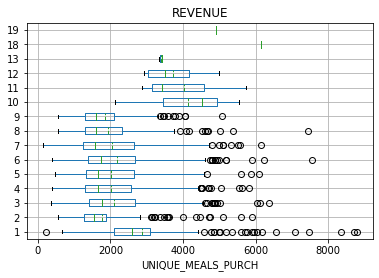

In [12]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.savefig(' UNIQUE MEAL.png')
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'UNIQUE_MEALS_PURCH',
					 data     = Chef)


#Median Revenue seems to increase as the number of unque meal purchases increases from 9 and above!
#However, the Sample size is smaller for those values only 2% the whole sample size.

In [13]:
#Both Values for Packaged Locker seem to be evenly distributed
#Both categories of people who have and have not specified their 
#tastes & preferences have a similar revenue distribution

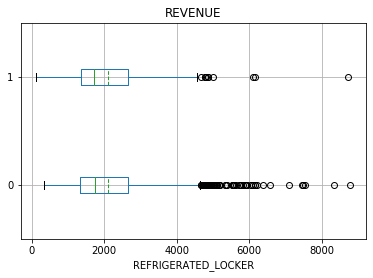

In [14]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'REFRIGERATED_LOCKER',
					 data     = Chef)


#Both Categorical Variables for Refrefirated Locker seems to be evenly distributed,
# however, the once that do not have the refrigirated locker seem to have higher number of outliers

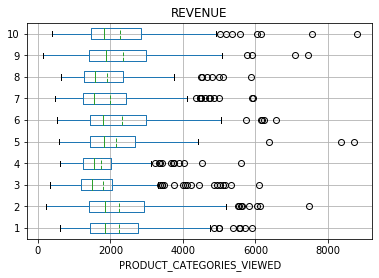

2     313
10    287
3     253
7     170
8     166
1     162
5     156
6     153
4     146
9     140
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64

In [15]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'PRODUCT_CATEGORIES_VIEWED',
					 data     = Chef)


Chef["PRODUCT_CATEGORIES_VIEWED"].value_counts()
#The revenue does not seem to vary a lot based on the number of product catagories viewed

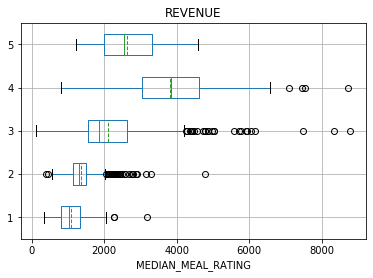

In [16]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.savefig(' MEAL RATING.png')
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'MEDIAN_MEAL_RATING',
					 data     = Chef)


#The Median Revenue seems to be almost doubling with each extra one point higher in meal rating, 
#however, this is true until a certain rating of four stars after that the Median Revenue drops

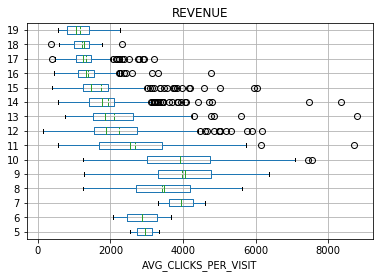

In [17]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.savefig('AVG_CLICKS_PER_VISIT.png')
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'AVG_CLICKS_PER_VISIT',
					 data     = Chef)

#The AVG_CLICKS seems to have a opposite effect after it reaches 10 clicks

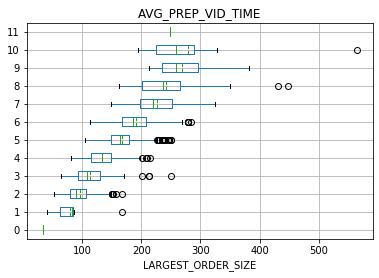

In [18]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'AVG_PREP_VID_TIME',
					 cat_var  = 'LARGEST_ORDER_SIZE',
					 data     = Chef)

#The AVG_prepararion time seems to be positively correlated with order size
#These people are more likely to be more passionate about cooking thus they spent more
#time on preparing their meals as well as purchase in larger quantities

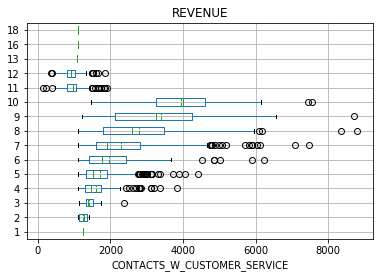

In [19]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.savefig(' CONTACTS_W_CUSTOMER_SERVICE.png')
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'CONTACTS_W_CUSTOMER_SERVICE',
					 data     = Chef)

#Number of Contacts_w_customer_sercvice seems to increase the median revenue 
#until it goes above 10 after which the revenue IQR starts to decline

In [20]:
# NO NEED TO CREATE DUMMIE VARIABLES AS THEY WOULD NOT BE VERY USEFUL FOR THIS DATASET ANALYSIS 

In [21]:
# creating a (Pearson) correlation matrix
df_corr = Chef.corr().round(2)

x = "REVENUE"
# printing (Pearson) correlations with SalePrice
print(df_corr.loc[:,x].sort_values(ascending = False)) 


#CORRELATION WITH REVENUE
#AVG_PREP_VID_TIME = 0.64
#MEDIAN_RATINGS = 0.61
#LARGEST_ORDER_SIZE = 0.44
#MASTER_CLASS_ATTENDED = 0.45
#AVG_CLICKS_PER_VISIT = (-0.55)
#TOTAL_MEALS_ORDERED = 0.6


##################################
#CORRELATION WITH AVG_PRER_VID_TIME
#LARGEST_ORDER_SIZE = 0.8
#MEDIAN_MEAL_RATING = 0.49
#MASTER_CLASSES_ATTENDED = 0.48


#################################
#AVG_CLICK_PER_VISIT HAS A STRONG NEGATIVE CORRELATION OF (-0.86) TO MEDIAN_MEAL_RATING
#INDICATING THAT IF THE CUSTOMER HAS LESS CLICKS DURING HIS/HER WEB VISIT THEN THEY 
#ARE LIKELIER TO GIVE A HIGHER RATING TO THEIR MEAL 

REVENUE                               1.00
out_REVENUE                           0.65
AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44
change_LARGEST_ORDER_SIZE             0.36
out_TOTAL_MEALS_ORDERED               0.36
out_TOTAL_PHOTOS_VIEWED               0.31
change_TOTAL_PHOTOS_VIEWED            0.29
change_TOTAL_MEALS_ORDERED            0.27
change_MASTER_CLASSES_ATTENDED        0.22
out_AVG_PREP_VID_TIME                 0.20
change_AVG_PREP_VID_TIMEE             0.18
out_UNIQUE_MEALS_PURCH                0.17
change_UNIQUE_MEALS_PURCH             0.17
AVG_TIME_PER_SITE_VISIT               0.14
CONTACTS_W_CUSTOMER_SERVICE           0.10
out_AVG_TIME_PER_SITE_VISIT           0.10
change_AVG_TIME_PER_SITE_VISIT        0.07
out_CANCELLATIONS_AFTER_NOON          0.04
out_MEDIAN_

In [22]:
# saving feature-rich dataset in Excel
Chef.to_csv('Chef_feature_rich.csv',
                 index = False)

In [23]:
# making a copy of housing
Chef_explanatory = Chef.copy()


# dropping SalePrice and Order from the explanatory variable set
Chef_explanatory = Chef.drop(['REVENUE'], axis=1)


# formatting each explanatory variable for statsmodels
for val in Chef_explanatory:
    print(f"Chef['{val}'] +")

Chef['CROSS_SELL_SUCCESS'] +
Chef['NAME'] +
Chef['EMAIL'] +
Chef['FIRST_NAME'] +
Chef['FAMILY_NAME'] +
Chef['TOTAL_MEALS_ORDERED'] +
Chef['UNIQUE_MEALS_PURCH'] +
Chef['CONTACTS_W_CUSTOMER_SERVICE'] +
Chef['PRODUCT_CATEGORIES_VIEWED'] +
Chef['AVG_TIME_PER_SITE_VISIT'] +
Chef['MOBILE_NUMBER'] +
Chef['CANCELLATIONS_BEFORE_NOON'] +
Chef['CANCELLATIONS_AFTER_NOON'] +
Chef['TASTES_AND_PREFERENCES'] +
Chef['MOBILE_LOGINS'] +
Chef['PC_LOGINS'] +
Chef['WEEKLY_PLAN'] +
Chef['EARLY_DELIVERIES'] +
Chef['LATE_DELIVERIES'] +
Chef['PACKAGE_LOCKER'] +
Chef['REFRIGERATED_LOCKER'] +
Chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
Chef['AVG_PREP_VID_TIME'] +
Chef['LARGEST_ORDER_SIZE'] +
Chef['MASTER_CLASSES_ATTENDED'] +
Chef['MEDIAN_MEAL_RATING'] +
Chef['AVG_CLICKS_PER_VISIT'] +
Chef['TOTAL_PHOTOS_VIEWED'] +
Chef['out_TOTAL_MEALS_ORDERED'] +
Chef['out_UNIQUE_MEALS_PURCH'] +
Chef['out_CONTACTS_W_CUSTOMER_SERVICE'] +
Chef['out_AVG_TIME_PER_SITE_VISIT'] +
Chef['out_CANCELLATIONS_BEFORE_NOON'] +
Chef['out_CANCELLATIO

In [24]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """Chef['REVENUE']~
Chef['CROSS_SELL_SUCCESS'] +
Chef['TOTAL_MEALS_ORDERED'] +
Chef['UNIQUE_MEALS_PURCH'] +
Chef['CONTACTS_W_CUSTOMER_SERVICE'] +
Chef['AVG_TIME_PER_SITE_VISIT'] +
Chef['AVG_PREP_VID_TIME'] +
Chef['LARGEST_ORDER_SIZE'] +
Chef['MASTER_CLASSES_ATTENDED'] +
Chef['MEDIAN_MEAL_RATING'] +
Chef['TOTAL_PHOTOS_VIEWED'] +
Chef['out_UNIQUE_MEALS_PURCH'] +
Chef['out_MASTER_CLASSES_ATTENDED'] +
Chef['out_MEDIAN_MEAL_RATING'] +
Chef['out_REVENUE'] +
Chef['change_TOTAL_MEALS_ORDERED'] +
Chef['change_UNIQUE_MEALS_PURCH'] +
Chef['change_CONTACTS_W_CUSTOMER_SERVICE'] +
Chef['change_AVG_PREP_VID_TIMEE'] +
Chef['change_MEDIAN_MEAL_RATING'] +
Chef['change_AVG_CLICKS_PER_VISIT'] +
Chef['change_TOTAL_PHOTOS_VIEWED'] """,
                               data = Chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
print(results_full.summary())

# delete Chef['ALL NAMES & EMAILS '] + as they cannot be used for this linear model due to their categoriacal status 
#only leave significant variables

#Create with all variables and delete 1 by 1 until all significan 
#Delete the one with highest p-value first
#ORDER:
#- change_MOBILE
# -MOBILE_NUMBER
# -Chef['AVG_CLICKS_PER_VISIT']
# -Chef['out_CANCELLATIONS_AFTER_NOON']
# -Chef['change_CANCELLATIONS_AFTER_NOON']
# -Chef['LATE_DELIVERIES']
# -Chef['MOBILE_LOGINS']
# -Chef['PC_LOGINS']
# -Chef['out_LATE_DELIVERIES']
# -Chef['out_EARLY_DELIVERIES']
# -Chef['out_CANCELLATIONS_BEFORE_NOON']
# -Chef['change_PC_LOGIN']
# -Chef['change_CANCELLATIONS_BEFORE_NOON']
# -Chef['change_WEEKLY_PLAN']
# -Chef['out_TOTAL_MEALS_ORDERED']
# -Chef['EARLY_DELIVERIES']
# -Chef['FOLLOWED_RECOMMENDATIONS_PCT']	
# -Chef['out_TOTAL_PHOTOS_VIEWED']
# -Chef['change_EARLY_DELIVERIES']
# -Chef['CANCELLATIONS_BEFORE_NOON']	
# -Chef['out_PC_LOGINS']	
# -Chef['PACKAGE_LOCKER'] 
# -Chef['out_MOBILE_LOGINS']
# -Chef['change_LARGEST_ORDER_SIZE']	
# -Chef['out_LARGEST_ORDER_SIZE']
# -Chef['change_MASTER_CLASSES_ATTENDED']
# -Chef['TASTES_AND_PREFERENCES']	
# -Chef['change_LATE_DELIVERIES']
# -Chef['WEEKLY_PLAN']
# -Chef['out_WEEKLY_PLAN']
# -Chef['REFRIGERATED_LOCKER']
# -Chef['change_REFRIGERATED_LOCKER']
# -Chef['change_MOBILE_LOGINS']
# -Chef['CANCELLATIONS_AFTER_NOON']
# -Chef['out_AVG_CLICKS_PER_VISIT']
# -Chef['change_AVG_TIME_PER_SITE_VISIT']



#ABOVE THIS POINT THE CONFIDENCE/SIGNIFICANCE LEVEL IS 10% with an Adj R2 of 0.774 
###########################################
#Chef['PRODUCT_CATEGORIES_VIEWED']
#Chef['out_AVG_TIME_PER_SITE_VISIT']
#Chef['out_CONTACTS_W_CUSTOMER_SERVICE']


#AFTER DEDUCTING THE THREE ABOVE VARIABLES WE GET AN Adj R2 of 0.773 with 5% CONFIDENCE LEVEL

                            OLS Regression Results                            
Dep. Variable:        Chef['REVENUE']   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     350.1
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:34:48   Log-Likelihood:                -15002.
No. Observations:                1946   AIC:                         3.004e+04
Df Residuals:                    1926   BIC:                         3.016e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [25]:
#DEALING WITH EMAIL ADDRESSES

#import gender_guesser.detector as gender # guess gender based on (given) name


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_MOBILE_LOGINS,out_PC_LOGINS,out_WEEKLY_PLAN,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MASTER_CLASSES_ATTENDED,out_MEDIAN_MEAL_RATING,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,out_REVENUE,change_TOTAL_MEALS_ORDERED,change_UNIQUE_MEALS_PURCH,change_CONTACTS_W_CUSTOMER_SERVICE,change_AVG_TIME_PER_SITE_VISIT,change_CANCELLATIONS_BEFORE_NOON,change_MOBILE_LOGINS,change_EARLY_DELIVERIES,change_LATE_DELIVERIES,change_AVG_PREP_VID_TIMEE,change_LARGEST_ORDER_SIZE,change_MASTER_CLASSES_ATTENDED,change_MEDIAN_MEAL_RATING,change_AVG_CLICKS_PER_VISIT,change_TOTAL_PHOTOS_VIEWED,change_WEEKLY_PLAN,change_MOBILE_NUMBER,change_CANCELLATIONS_AFTER_NOON,change_PC_LOGINS,change_REFRIGERATED_LOCKER
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [26]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in Chef.iterrows():
    
    # splitting email domain at '@'
    split_email = Chef.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [27]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations


# renaming column to concatenate
email_df.columns = ["name" , "personal_email_domain"]


# concatenating personal_email_domain with friends DataFrame
Chef = pd.concat([Chef, email_df.loc[: , "personal_email_domain"]],
                   axis = 1)


# printing value counts of personal_email_domain
Chef.loc[: ,'personal_email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
mcdonalds.com        28
merck.com            28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
microsoft.com        25
chevron.com          25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
caterpillar.com      22
pg.com               22
verizon.com          22
mmm.com              22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
intel.com            17
homedepot.com        17
Name: personal_email_domain, dtype: int64

In [28]:
# email domain types
professional_emai_domains      = ['@mmm.com', '@amex.com' '@apple.com',
'@boeing.com', '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com', 
'@disney.com', '@dupont.com', '@exxon.com', '@ge.org', '@goldmansacs.com', 
'@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com', '@jpmorgan.com', 
'@mcdonalds.com', '@merck.com', '@microsoft.com', '@nike.com', 
'@pfizer.com', '@pg.com', '@travelers.com', '@unitedtech.com', '@unitedhealth.com', 
'@verizon.com', '@visa.com', '@walmart.com', '@apple.com', '@amex.com']

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains  = ['@me.com',
'@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in Chef['personal_email_domain']:
        if '@'+ domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@'+ domain in professional_emai_domains:
            placeholder_lst.append('proffessional')
            
        elif '@'+ domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print("Unkown")


# concatenating with original DataFrame
Chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
Chef['domain_group'].value_counts()

personal         861
proffessional    696
junk             389
Name: domain_group, dtype: int64

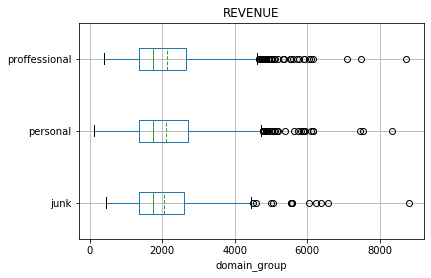

In [29]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'domain_group',
					 data     = Chef)


#The revenue does not seem to vary a lot based on the Domain Group
#Most customers use personal or junk email

In [30]:
# COULD NOT DOWNLOAD THE PACKAGE help(gender.Detector().get_gender) SESHION 3A

In [31]:
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_MOBILE_LOGINS,out_PC_LOGINS,out_WEEKLY_PLAN,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MASTER_CLASSES_ATTENDED,out_MEDIAN_MEAL_RATING,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,out_REVENUE,change_TOTAL_MEALS_ORDERED,change_UNIQUE_MEALS_PURCH,change_CONTACTS_W_CUSTOMER_SERVICE,change_AVG_TIME_PER_SITE_VISIT,change_CANCELLATIONS_BEFORE_NOON,change_MOBILE_LOGINS,change_EARLY_DELIVERIES,change_LATE_DELIVERIES,change_AVG_PREP_VID_TIMEE,change_LARGEST_ORDER_SIZE,change_MASTER_CLASSES_ATTENDED,change_MEDIAN_MEAL_RATING,change_AVG_CLICKS_PER_VISIT,change_TOTAL_PHOTOS_VIEWED,change_WEEKLY_PLAN,change_MOBILE_NUMBER,change_CANCELLATIONS_AFTER_NOON,change_PC_LOGINS,change_REFRIGERATED_LOCKER,personal_email_domain,domain_group
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,passport.com,junk
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,jnj.com,proffessional
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,gmail.com,personal
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,ibm.com,proffessional
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,goldmansacs.com,proffessional


In [32]:

Chef_data   = Chef.drop(['REVENUE',
                         'out_REVENUE'],
                                axis = 1)


# preparing response variable data
Chef_target = Chef.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            Chef_data,
            Chef_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 66)
(1459,)
(487, 66)
(487,)


In [ ]:
x_variables = ['CROSS_SELL_SUCCESS',
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'AVG_TIME_PER_SITE_VISIT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'TOTAL_PHOTOS_VIEWED',
'out_UNIQUE_MEALS_PURCH',
'out_MASTER_CLASSES_ATTENDED',
'out_MEDIAN_MEAL_RATING',
'out_REVENUE',
'change_TOTAL_MEALS_ORDERED',
'change_UNIQUE_MEALS_PURCH',
'change_CONTACTS_W_CUSTOMER_SERVICE', 
'change_AVG_PREP_VID_TIMEE',
'change_MEDIAN_MEAL_RATING',
'change_AVG_CLICKS_PER_VISIT',
'change_TOTAL_PHOTOS_VIEWED']

In [ ]:
# applying model in scikit-learn
#Apply the above regression model in scikit-learn:
#Set housing_data to the x_variables list
#Set housing_target to SalePrice
#Run train_test_split with a test_size of 0.25 and a random_state of 222.
#NOTE: THE RANDOM STATE VALUE HAS AN EFFECT ON ALL THE TEST SCORES USE 94 FOR HIGHEST SCORE

# Preparing a DataFrame based the the analysis above
Chef_data   = Chef.loc[ : , x_variables]


# Preparing the target variable
Chef_target = Chef.loc[:, 'REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            Chef_data,
            Chef_target,
            test_size = 0.25,
            random_state = 222)

In [ ]:
#INSTANTIATE a LinearRegression( ) object
#FIT the training data to the model object
#PREDICT using the testing data
#SCORE your results, rounding to four decimal places


# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

# As the training and testing scores are within 0.05 of each other, the model is considered to be good 
#Not ovcerfitting or underfitting.

In [ ]:
import sklearn.linear_model

In [ ]:
# ridge regression model 
#INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

In [ ]:
# lasso regression model
#INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

In [ ]:
# Elastic Net 
#INSTANTIATING a model object
Elastic_model = sklearn.linear_model.ElasticNet() 

# FITTING the training data
Elastic_fit = Elastic_model.fit(X_train, y_train)


# PREDICTING on new data
Elastic_model_pred = Elastic_model.predict(X_test)

print('Training Score:', Elastic_model.score(X_train, y_train).round(4))
print('Testing Score:',  Elastic_model.score(X_test, y_test).round(4))


# saving scoring data for future use
Elastic_model_train_score = Elastic_model.score(X_train, y_train).round(4)
Elastic_model_test_score  = Elastic_model.score(X_test, y_test).round(4)

In [ ]:
# Bayesian ARD regression model
#INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)

In [ ]:
# Huber Regression
HB_model = sklearn.linear_model.HuberRegressor() 


# FITTING the training data
HB_fit = HB_model.fit(X_train,y_train)


# PREDICTING on new data
HB_pred = HB_fit.predict(X_test)


print('Training Score:', HB_model.score(X_train,y_train).round(4))
print('Testing Score:',  HB_model.score(X_test,y_test).round(4))


# saving scoring data for future use
HB_train_score = HB_model.score(X_train,y_train).round(4)
HB_test_score  = HB_model.score(X_test,y_test).round(4)


In [ ]:
from sklearn.tree import DecisionTreeRegressor  

#Decision tree not scaled
DTR=DecisionTreeRegressor(min_samples_leaf=0.1,random_state=222)
DTR.fit(X_train,y_train)
DTR_predd=DTR.predict(X_test)

# SCORING the results
print('Training Score:', DTR.score(X_train, y_train).round(4))
print('Testing Score:',  DTR.score(X_test, y_test).round(4))


# saving scoring data for future use
DTR_score_training = DTR.score(X_train, y_train).round(4)
DTR_score_testing  = DTR.score(X_test, y_test).round(4)

#not bad, but we can do better

In [ ]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
EM         {Elastic_model_train_score}           {Elastic_model_test_score}
Haber      {HB_train_score}           {HB_test_score}
DTR        {DTR_score_training}           {DTR_score_testing}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD', 'EM', 'HB', 'DTR'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score, 
                                   Elastic_model_train_score,HB_train_score,
                                   DTR_score_training],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score,
                                  Elastic_model_test_score, HB_test_score,
                                   DTR_score_testing]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to CSV
model_performance.to_csv('regression_model_performance.csv',
                           index = False)

In [ ]:
#""""Part IV: Model Predictions and Residuals
#After choosing a final model, it is important to check its residuals to 
#ensure prediction errors are even across the modeling space. If the residuals 
#appear to have no pattern, your model is in good shape. If they appear to be 
#fanning in or fanning out, there may be more undiscovered features to engineer 
#in order to capture more predictive value, or there may be nonlinear 
#relationships present.""""

In [ ]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a residual plot
sns.residplot(x = ridge_pred,
              y = y_test)


# saving figure in working directory
plt.savefig("CHEF RESIDUAL PLOT.png")


# displaying the plot
plt.show()

#Seems to be no specific pattern in the residuals thus indicating the model is in "good" shape
#It is also effected by the number that is used for random_state in the split function (94) seems to be optimal

In [ ]:
#KNN

# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file names
dataset_file     = 'Chef_feature_rich.csv'
performance_file = 'regression_model_performance.csv'

# reading the files into Python
Chef        = pd.read_csv(dataset_file)
performance = pd.read_csv(performance_file)

In [ ]:
performance.head(n = 5)

In [ ]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(Chef_data)


# TRANSFORMING our data after fit (interpreting the data as below(negative) or above(positive) average)
X_scaled = scaler.transform(Chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

#Indicating columns for each variable from # to "text"
X_scaled_df.columns = Chef_data.columns

# checking the results
X_scaled_df.describe().round(2)

In [ ]:
#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(Chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")

In [ ]:
#EXACTLY THE SAME CORRELATION FOR BOTH STANDARDIZED AND UNSTANDARDIZED, THUS STANDARDIZATION WAS SUCCESSFUL !!!!!!!!!

In [ ]:
# this is the exact code we were using before
X_train, X_test, y_train,y_test = train_test_split(
            Chef_data,
            Chef_target,
            test_size = 0.25,
            random_state = 222)
#THE RANDOM_STATE SHOULD BE KEPT THE SAME AS THE ONE USED FOR PREVIOUS MODEL PREDICTIONS

In [ ]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)


# SCORING the results
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score:',  knn_reg.score(X_test,y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test,y_test).round(4)

In [ ]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 40 neighbors
neighbors_settings = range(1, 40)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [ ]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [ ]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train,y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train,y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

In [ ]:
# TRAIN_TEST SPLIT USING THE STANDARDIZED DATA
X_train, X_test, y_train,y_test = train_test_split(
            X_scaled_df,
            Chef_target,
            test_size = 0.25,
            random_state = 222)
#THE RANDOM_STATE SHOULD BE KEPT THE SAME AS THE ONE USED FOR PREVIOUS MODEL PREDICTIONS

In [ ]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")




In [ ]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train,y_train).round(4))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(4))

# saving scoring data for future use
knn_stand_score_train =  knn_stand.score(X_train,y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

In [ ]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}                {knn_reg_score_test}
Non-Standardized      11            {knn_opt_score_train}             {knn_opt_score_test}
Standardized          10            {knn_stand_score_train}             {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['KNN_NS_1', 'KNN_NS_11', 'KNN_S_10'],
           
                     'Training' : [knn_reg_score_train, knn_opt_score_train,
                                   knn_stand_score_train],
           
                     'Testing'  : [knn_reg_score_test, knn_opt_score_test,
                                   knn_stand_score_test]}

In [ ]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)


# sending model results to Excel
total_performance.to_csv('regression_model_performance.cvs',
                           index = False)

In [ ]:
total_performance